In [1]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Understanding Approximation of Log Det Jac

/Users/kayhan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in log
/Users/kayhan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:63: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


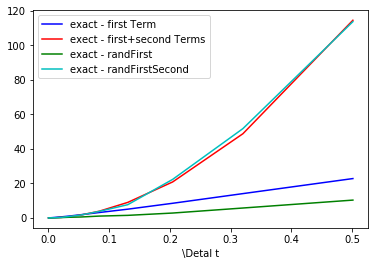

In [7]:
n = 20
alpha = 0.001
d = 50
m = 10

errs1 = []
errs2 = []
errs3 = []
errs4 = []
x_range = np.linspace(-4,-0.3,20)
for j in x_range:
    alpha = 10**j
    ee1 = []
    ee2 = []
    ee3 = []
    ee4 = []
    for i in range(n):
        J = np.random.rand(d,d)
        # exact 
        exact = np.log(np.linalg.det( np.eye(d) +  alpha*J ))
        if np.isnan(exact):
            continue

        # approximate 1
        approx1 = alpha*np.trace(J + J.T)
      
        # approximate 2
        approx2 = 0.5*alpha*np.trace(J + J.T) + 0.5*(alpha**2)*np.trace(J.dot(J.T))
        
        # approximate 3
        s = 0
        for ii in range(m):
          r = np.random.randn(d,1)
          s = s + 0.5*r.T.dot(J.dot(r))
          s = s + 0.5*r.T.dot(J.T.dot(r))  
          #s = s + r.T.dot(J.dot(r))
        s = s/m
        approx3 = alpha*s
        
        # approximate 4
        s = 0
        for ii in range(m):
          r = np.random.randn(d,1)
          s = s + 0.5*np.linalg.norm( J.dot(r) )**2
        s = s/m
        approx4 = approx3 + alpha**2*s 
        
        
        ee1.append( np.abs(exact - approx1) )
        ee2.append( np.abs(exact - approx2) )
        ee3.append( np.abs(exact - approx3) )
        ee4.append( np.abs(exact - approx4) )
    errs1.append(mean(ee1))
    errs2.append(mean(ee2))
    errs3.append(mean(ee3))
    errs4.append(mean(ee4))
      
  
#print "exact : ", exact
#print "approx : ", approx
  
plot(10**x_range, np.array(errs1),'b', label='exact - first Term')
hold(True)
plot(10**x_range, np.array(errs2),'r',label='exect - first+second Terms')
plot(10**x_range, np.array(errs3),'g',label='exact - randFirst')
plot(10**x_range, np.array(errs4),'c',label='exact - randFirstSecond')
xlabel('\Detal t')
legend()




/Users/kayhan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  from ipykernel import kernelapp as app


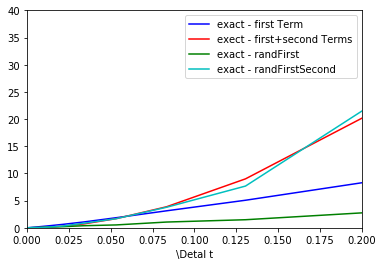

In [8]:
plot(10**x_range, np.array(errs1),'b', label='exact - first Term')
hold(True)
plot(10**x_range, np.array(errs2),'r',label='exect - first+second Terms')
plot(10**x_range, np.array(errs3),'g',label='exact - randFirst')
plot(10**x_range, np.array(errs4),'c',label='exact - randFirstSecond')
xlabel('\Detal t')
axis([0,0.2,0,40])
legend()

In [28]:
errs1

[0.0025471150949601669,
 0.0038131223927610736,
 0.006328918676497962,
 0.0097138380930747881,
 0.01495115508648422,
 0.023659485848031896,
 0.036677763348891543,
 0.060770876343588978,
 0.093982737078288026,
 0.1524094094430381,
 0.24393251851770614,
 0.40120229224861859,
 0.67036725631187721,
 1.0494914216139888,
 1.7942275763012727,
 3.0534861617388094,
 5.0878886434302224,
 8.4909446728597562,
 13.856755066843613,
 24.20174130280293]

In [29]:
errs2

[7.3275608637697352e-06,
 1.7911018656073463e-05,
 4.3839684887135054e-05,
 0.00010767467187872458,
 0.00026270517656062226,
 0.00064278327064446589,
 0.0015718913704440708,
 0.0038626811371309201,
 0.0092940274424286647,
 0.022296599369871949,
 0.054208362204770745,
 0.12920852784659345,
 0.30920462677012839,
 0.71874467888665206,
 1.6747327806555745,
 3.8422043134161257,
 8.9210549925489282,
 20.674879535917075,
 48.686037793235364,
 114.84996435117267]

In [30]:
errs3

[0.00096172815749060272,
 0.0013047943656844065,
 0.0033071432673528779,
 0.0032308881763684653,
 0.0063363363498822921,
 0.012842708159483629,
 0.014398978110913365,
 0.022708998471232821,
 0.037116304410045327,
 0.052071645925163404,
 0.080105075137651777,
 0.15591537974421962,
 0.25370693788365017,
 0.32062485106609018,
 0.67262355858395839,
 0.97184641329827604,
 1.2152245303110534,
 3.0696297227718867,
 6.1105892651852924,
 10.69561778773944]

In [20]:
nan==np.nan

False

In [31]:
np.linalg.norm?

Signature: np.linalg.norm(x, ord=None, axis=None, keepdims=False)
Docstring:
Matrix or vector norm.

This function is able to return one of eight different matrix norms,
or one of an infinite number of vector norms (described below), depending
on the value of the ``ord`` parameter.

Parameters
----------
x : array_like
    Input array.  If `axis` is None, `x` must be 1-D or 2-D.
ord : {non-zero int, inf, -inf, 'fro', 'nuc'}, optional
    Order of the norm (see table under ``Notes``). inf means numpy's
    `inf` object.
axis : {int, 2-tuple of ints, None}, optional
    If `axis` is an integer, it specifies the axis of `x` along which to
    compute the vector norms.  If `axis` is a 2-tuple, it specifies the
    axes that hold 2-D matrices, and the matrix norms of these matrices
    are computed.  If `axis` is None then either a vector norm (when `x`
    is 1-D) or a matrix norm (when `x` is 2-D) is returned.
keepdims : bool, optional
    If this is set to True, the axes which are normed

In [32]:
np.linalg.norm(np.array([1,1]))

1.4142135623730951